In [56]:
import numpy as np
import astropy as ap
import matplotlib.pyplot as plt
from read_data import *
%matplotlib inline

### We will use two functions imported from read_data: get_fn_list() and build_tables().
### Build tables takes a filename to one an output file from a simulation and turns it into an astropy table.
### If we want a list of filenames, we can use the function get_fn_list(), which takes as inputs the directory
### to the outputs folder, the number of the first file we want to read, and the number of the last file. It then
### returns a list of the correct filenames which we can then feed to build_table().

In [81]:
### Get list of files we want to build tables from
fns = get_fn_list("../outputs/",0,10)

### Build a list of tables for each file
tables = []
for fn in fns:
    tables.append(build_table(fn))

Assuming linearly spaced grid...
Assuming linearly spaced grid...
Assuming linearly spaced grid...
Assuming linearly spaced grid...
Assuming linearly spaced grid...
Assuming linearly spaced grid...
Assuming linearly spaced grid...
Assuming linearly spaced grid...
Assuming linearly spaced grid...
Assuming linearly spaced grid...
Assuming linearly spaced grid...


### Lets make a plotting interface, which we can test for one of our tables. 

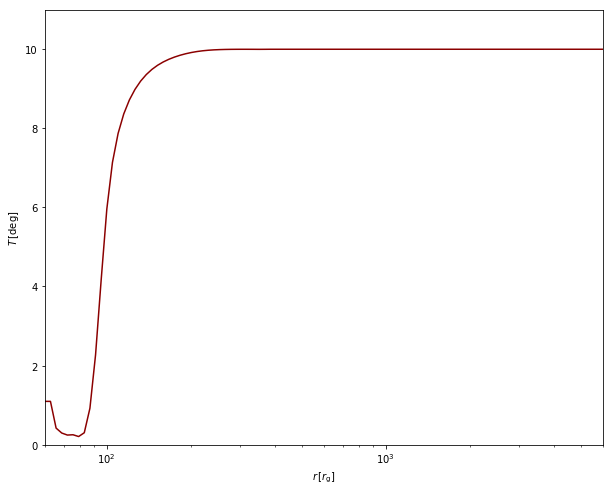

<Figure size 432x288 with 0 Axes>

In [82]:
def plot_interface(table):
    ## Modify the body of this function for the plot you want
    fig = plt.figure(figsize=(10,8))
    plt.plot(table["r"],table["tilt"],color="darkred")
    plt.xlabel(r"$r\,[r_{\rm g}]$")
    plt.ylabel(r"$T\,[{\rm deg}]$")
    plt.xlim(table["r"][0],table["r"][-1])
    plt.ylim(0,11)
    plt.xscale('log')
    return fig

fig = plot_interface(tables[-1])
plt.show()
plt.clf()

### Lets say we want to plot the quantities as a movie. We do this by making .png frames of each snapshot and then combining them into a movie using ffmpeg. 
### We iterate through each table that we have generated, then we use our plotting interface to get the figure from matplotlib that we want. 
### Then, we just save this as a series of .png files. From command line, we can do this using ffmpeg, for instance:
### "ffmpeg -r 5 -s 1920x1080 -i tilt_%03d.png test.mp4"
### -r sets the frames per second; -s sets the resolution; -i sets the files we want to read, where %03d indicates we're look for integers of length 3, i.e. 1 --> 001, 10 --> 010, etc; and then test.mp4 is just the name of our file.
### We can do this interactively in jupyter notebook (auto = 1) and remove the .png files afterwards, if we want, as well (clean = 1)

In [12]:
##################
## User Parameters

# Prefix will be appended with 001.png,002.png,003.png,...
path_prefix = "../plots/tilt_"

# Movie path will be appended with .mp4
movie_path = "../plots/test"

# Make a movie if auto = 1
auto = 1

# Remove all files starting with path_prefix if clean = 1
clean = 1

##
##################

## Call plotting interface to build frames
png_names = []
for i,table in enumerate(tables):
    suffix = str(i).zfill(4)
    fig = plot_interface(table)
    fig.savefig(path_prefix+suffix)
    png_names.append(path_prefix+suffix + ".png")
    plt.clf()

# Use ffmpeg from command line interface
if (auto):
    !ffmpeg -r 5 -s 1920x1080 -i {path_prefix}%04d.png {movie_path}.mp4

# You can just delete the .png files if you already made your movie
if (clean):
    for name in png_names:
        !rm $name

ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --ena

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>